## Exploratory Data Analysis

In [ ]:
# Loading all the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Load the credit card transaction data
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Let us see if there are any missing values in the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### This implies that we do not have any Null values in our dataset. Hence, no need to handle them.

In [ ]:
# Lets look at the data distribution in terms of their percentile values across features
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<AxesSubplot:xlabel='Class', ylabel='Count'>

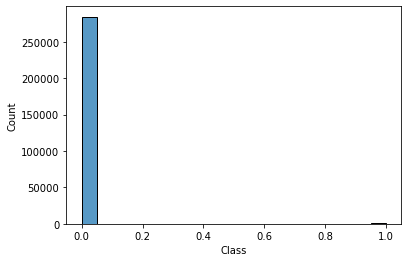

In [ ]:
sns.histplot(data=df, x='Class')

In [ ]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Most of our data (almost 99.8%) are non fraudulent (class 0) and only less than 2% data is fraudulent. Hence, the dataset is highly skewed

<AxesSubplot:xlabel='Amount', ylabel='Density'>

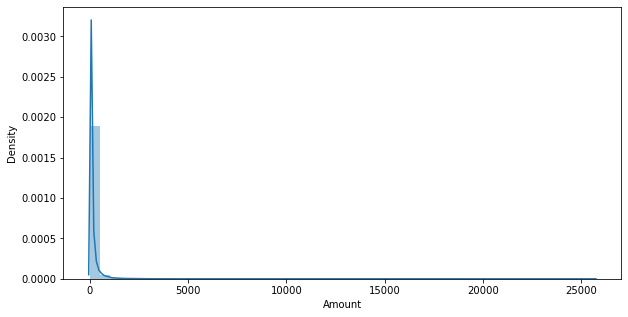

In [ ]:
# Let us focus on other features (un-normalized ones like Time and amount and see their distributions)
plt.figure(figsize=(10,5))
sns.distplot(df['Amount'])

<AxesSubplot:xlabel='Time', ylabel='Density'>

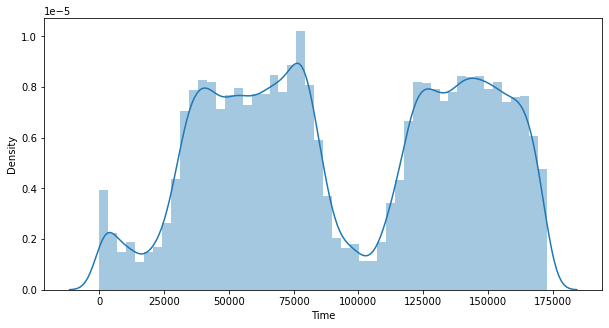

In [ ]:
# Let us focus on other features (un-normalized ones like Time and amount and see their distributions)
plt.figure(figsize=(10,5))
sns.distplot(df['Time'])

### Inferences
1. Amount feature is highly skewed and we can see that most transactions are less than 1000$
2. Time feature is bi-modal in nature

In [ ]:
# Let us normalize the features using standard scaler.
sc = StandardScaler()
df['Amount'] = sc.fit_transform(np.array(df['Amount']).reshape(-1,1))
df['Time'] = sc.fit_transform(np.array(df['Time']).reshape(-1,1))

In [ ]:
df.head(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0


# Baseline Model

1. Let us create models without doing any sampling techniques

<AxesSubplot:>

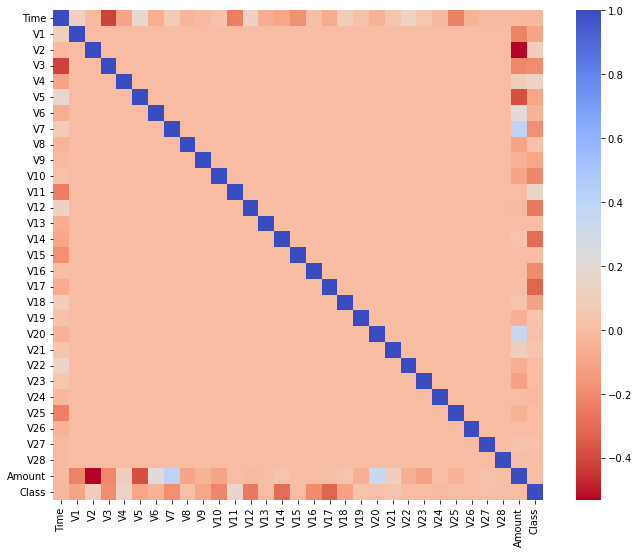

In [ ]:
# Correlation
plt.figure(figsize = (12, 9))
sns.heatmap(df.corr(), square=True, cmap='coolwarm_r')

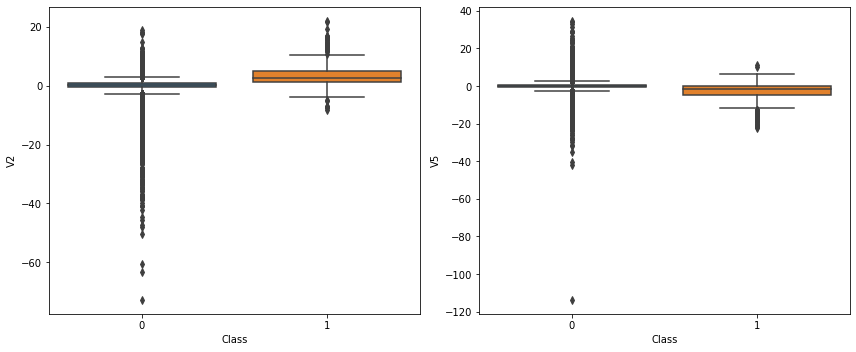

In [ ]:
# Let us take a look at V2 and V5
vs = ['V2', 'V5']
_, axes = plt.subplots(nrows = 1, ncols=2, figsize=(12,5))

for i in range(0, 2):
    y = vs[i]
    #i, j = divmod(i, 2)
    sns.boxplot(x="Class", y=y, data=df, ax=axes[i])
plt.tight_layout()

In [ ]:
# vs = ['V3', 'V4', 'V10', 'V11', 'V12', 'V14', 'V16','V17']
# for col in vs:
#     temp = np.array(new_df[col].loc[new_df['Class']==1])
#     a, b = np.percentile(temp, 25), np.percentile(temp, 75)
#     lower, upper = a - 1.5*(b - a), b + 1.5*(b - a)
#     idx_to_drop = new_df[(new_df[col] > upper) | (new_df[col] < lower)].index
    
#     new_df.drop(idx_to_drop, inplace=True)
#     print()

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
mean_lr_cv = np.mean(cross_val_score(lr, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('Logistic Reg Model: ', str(mean_lr_cv))
preds = lr.predict(X_test)
print(roc_auc_score(y_test, preds))

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
mean_knn_cv = np.mean(cross_val_score(knn, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('KNN : ', str(mean_knn_cv))
preds = knn.predict(X_test)
print(roc_auc_score(y_test, preds))

svc = SVC()
svc.fit(X_train, y_train)
mean_svc_cv = np.mean(cross_val_score(svc, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('SVM',str(mean_svc_cv))
preds = svc.predict(X_test)
print(roc_auc_score(y_test, preds))

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
mean_dt_cv = np.mean(cross_val_score(dt, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('DT',str(mean_dt_cv))
preds = dt.predict(X_test)
print(roc_auc_score(y_test, preds))

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
mean_rf_cv = np.mean(cross_val_score(rf, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('RF',str(mean_rf_cv))
preds = rf.predict(X_test)
print(roc_auc_score(y_test, preds))

# xgboost = xgb.XGBClassifier(objective='binary:logistic')
# xgboost.fit(X_train, y_train)
# mean_xgboost_cv = np.mean(cross_val_score(xgboost, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
# print('XG',str(mean_xgboost_cv))

Logistic Reg Model:  0.9742367965855845
0.8167525428084921
KNN :  0.9244034673540844
0.9009373387700178
SVM 0.9367504821876466
0.8464818932254634
DT 0.8782461098810419
0.9057559332198147
RF 0.9419981715641136
0.8860858536215029


# In order to handle class imbalance, we will try different sampling techniques as follows:



1.   Simple Random Undersampling
2.   Random Oversampling
3.   SMOTE

We will also try outlier treatment in the dataset to see how they impact our analysis and final results.



## Random Undersampling

1. Let us make equal ratio of fraud and non-fraud data
2. We have just 492 fraud data, so let us randomly sample 492 data from non-fraud data

In [ ]:
df = shuffle(df)

In [ ]:
frauds = df[df.Class == 1]
non_frauds = df[df.Class == 0]

In [ ]:
new_df = pd.concat([frauds, non_frauds.sample(n=492)])

In [ ]:
print(new_df.shape)

(984, 31)


In [ ]:
new_df.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

<AxesSubplot:>

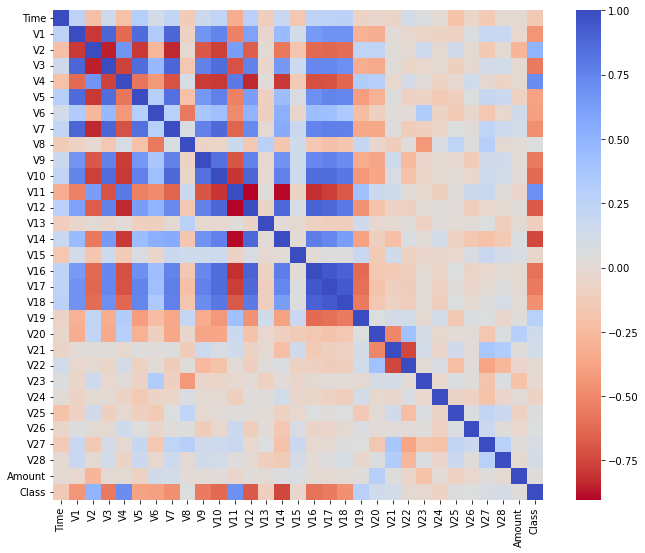

In [ ]:
# Correlation
plt.figure(figsize = (12, 9))
sns.heatmap(new_df.corr(), square=True, cmap='coolwarm_r')

### Now, let us dive deeper into the features that have strong negative or positive correlation with the Class variable

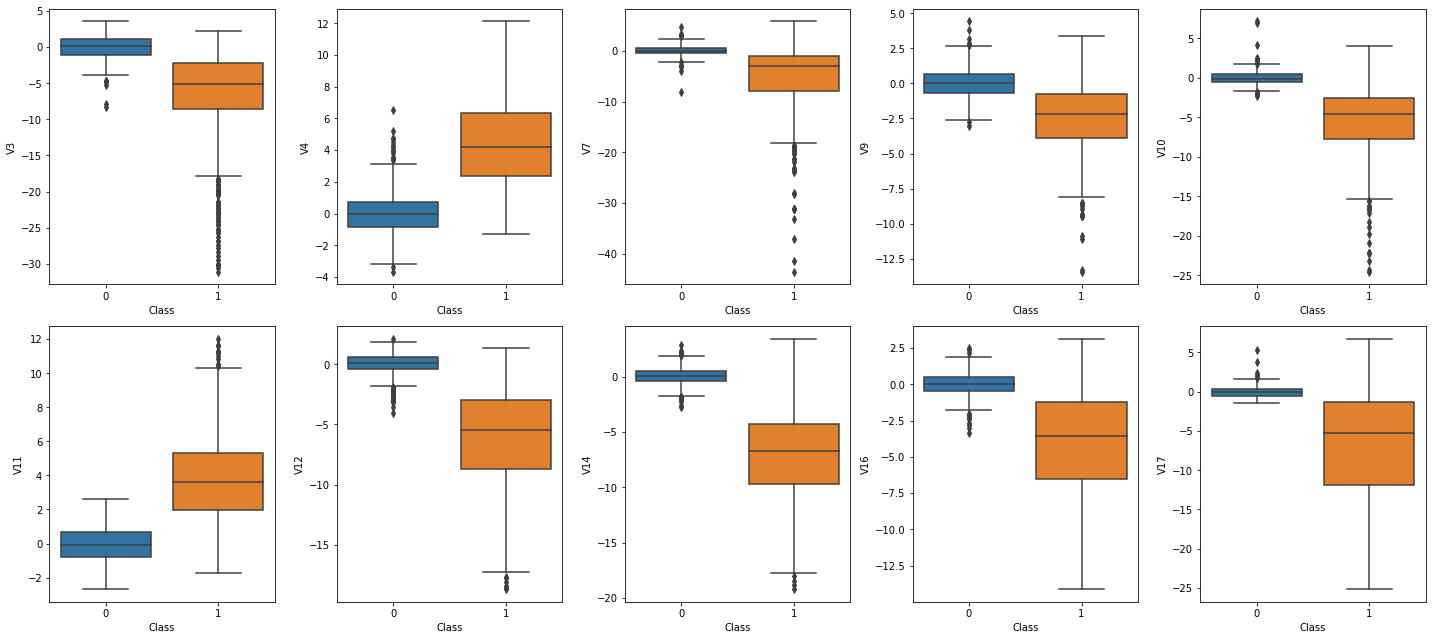

In [ ]:
vs = ['V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16','V17']
_, axes = plt.subplots(nrows = 2, ncols=5, figsize=(20,9))

for i in range(0, 10):
    y = vs[i]
    i, j = divmod(i, 5)
    sns.boxplot(x="Class", y=y, data=new_df, ax=axes[i, j])
plt.tight_layout()

Clearly, we can see that features V7 and V9 do not have very great insight on their capacity to differentiate between the positive and negative classes.

We also see that the dataset (which is a result of a previously PCA transformation) is linearly separable and hence, we will try to fit simple to complex models. We will use K-fold cross validation technique to select the best performing model and tune its hyperparameters.

In [ ]:
"""
Implement models:
1. Binary logistic regression
2. K-Nearest Neighbors
3. Support Vector Machines
4. Decision Tree Algorithm
5. Random Forest Classifier 
"""

X = new_df.drop('Class', axis=1)
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

lr = LogisticRegression()
lr.fit(X_train, y_train)
mean_lr_cv = np.mean(cross_val_score(lr, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('Logistic Reg Model: ', str(mean_lr_cv))
preds = lr.predict(X_test)
print(roc_auc_score(y_test, preds))

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
mean_knn_cv = np.mean(cross_val_score(knn, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('KNN : ', str(mean_knn_cv))
preds = knn.predict(X_test)
print(roc_auc_score(y_test, preds))

svc = SVC()
svc.fit(X_train, y_train)
mean_svc_cv = np.mean(cross_val_score(svc, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('SVM',str(mean_svc_cv))
preds = svc.predict(X_test)
print(roc_auc_score(y_test, preds))

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
mean_dt_cv = np.mean(cross_val_score(dt, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('DT',str(mean_dt_cv))
preds = dt.predict(X_test)
print(roc_auc_score(y_test, preds))

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
mean_rf_cv = np.mean(cross_val_score(rf, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('RF',str(mean_rf_cv))
preds = rf.predict(X_test)
print(roc_auc_score(y_test, preds))

# xgboost = xgb.XGBClassifier(objective='binary:logistic')
# xgboost.fit(X_train, y_train)
# mean_xgboost_cv = np.mean(cross_val_score(xgboost, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
# print('XG',str(mean_xgboost_cv))

Logistic Reg Model:  0.9805473372781066
0.9388785817357247
KNN :  0.9764669625246549
0.9387755102040816
SVM 0.9829487179487181
0.9285714285714286
DT 0.9034615384615385
0.939136260564832
RF 0.9842094017094019
0.9388785817357247


## Anamoly detection

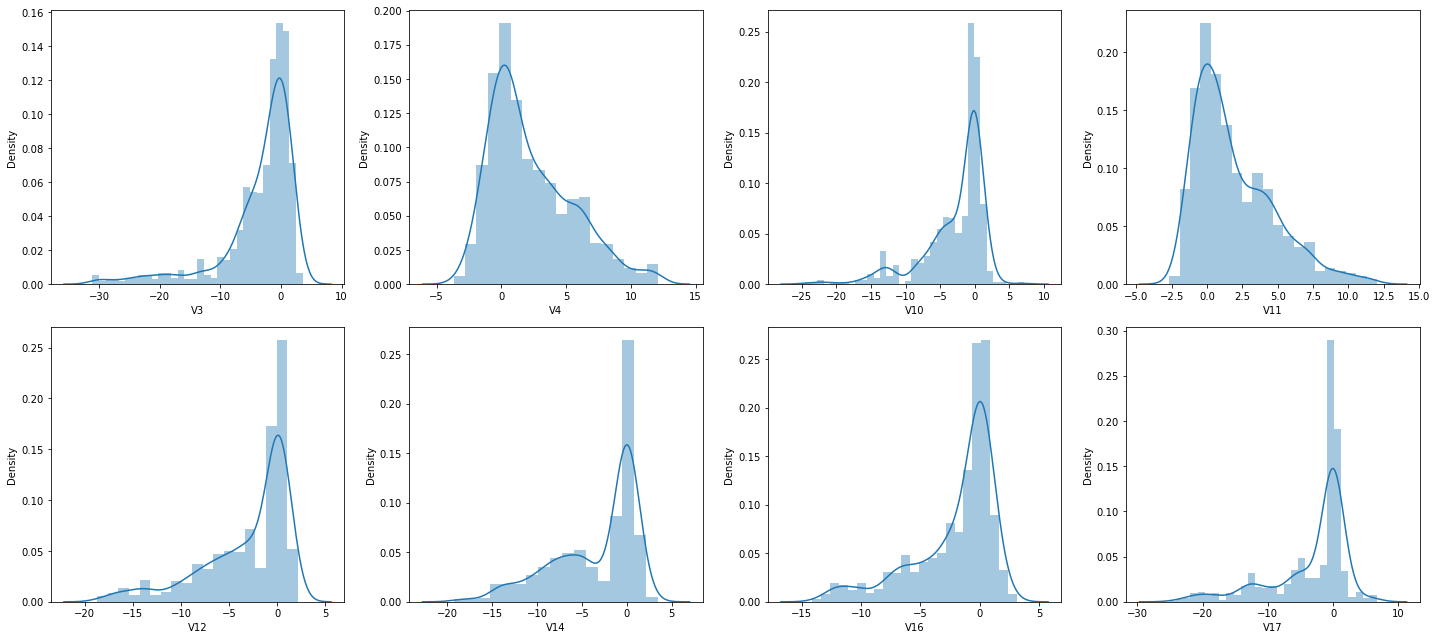

In [ ]:
# Let us remove extreme outliers from the data that has high correlation with the our target variables
vs = ['V3', 'V4', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']
_, axes = plt.subplots(nrows = 2, ncols=4, figsize=(20,9))
for i in range(0, 8):
    y = vs[i]
    i, j = divmod(i, 4)
    sns.distplot(new_df[y], ax=axes[i, j])
plt.tight_layout()

In [ ]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
vs = ['V3', 'V4', 'V10', 'V11', 'V12', 'V14', 'V16','V17']
X_train_c = pd.concat([X_train, y_train], axis=1)
for col in vs:
    temp = np.array(X_train_c[col].loc[X_train_c['Class']==1])
    a, b = np.percentile(temp, 25), np.percentile(temp, 75)
    lower, upper = a - 1.5*(b - a), b + 1.5*(b - a)
    idx_to_drop = X_train_c[(X_train_c[col] > upper) | (X_train_c[col] < lower)].index
    
    X_train_c.drop(idx_to_drop, inplace=True)
    print()
    
# Let us remove extreme outliers from the data that has high correlation with the our target variables
vs = ['V3', 'V4', 'V10', 'V11', 'V12', 'V14', 'V16','V17']
_, axes = plt.subplots(nrows = 2, ncols=4, figsize=(20,9))
for i in range(0, 8):
    y = vs[i]
    i, j = divmod(i, 4)
    sns.distplot(X_train_c[y], ax=axes[i, j])
plt.tight_layout()

### Modelling with the outlier treated undersampled data

In [ ]:
# X = new_df.drop('Class', axis=1)
# y = new_df['Class']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = X_train_c.drop('Class', axis=1)
y_train = X_train_c['Class']

In [ ]:
print(X_train.shape)

In [ ]:
# X = new_df.drop('Class', axis=1)
# y = new_df['Class']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

lr = LogisticRegression()
lr.fit(X_train, y_train)
mean_lr_cv = np.mean(cross_val_score(lr, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('Logistic Reg Model: ', str(mean_lr_cv))
preds = lr.predict(X_test)
print(roc_auc_score(y_test, preds))

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
mean_knn_cv = np.mean(cross_val_score(knn, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('KNN : ', str(mean_knn_cv))
preds = knn.predict(X_test)
print(roc_auc_score(y_test, preds))

svc = SVC()
svc.fit(X_train, y_train)
mean_svc_cv = np.mean(cross_val_score(svc, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('SVM',str(mean_svc_cv))
preds = svc.predict(X_test)
print(roc_auc_score(y_test, preds))

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
mean_dt_cv = np.mean(cross_val_score(dt, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('DT',str(mean_dt_cv))
preds = dt.predict(X_test)
print(roc_auc_score(y_test, preds))

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
mean_rf_cv = np.mean(cross_val_score(rf, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('RF',str(mean_rf_cv))
preds = rf.predict(X_test)
print(roc_auc_score(y_test, preds))

# xgboost = xgb.XGBClassifier(objective='binary:logistic')
# xgboost.fit(X_train, y_train)
# mean_xgboost_cv = np.mean(cross_val_score(xgboost, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
# print('XG',str(mean_xgboost_cv))

Logistic Reg Model:  0.9752270253798268
0.9337250051535766
KNN :  0.9678183361629882
0.9387755102040816
SVM 0.97880704656596
0.9337250051535766
DT 0.8900215489094945
0.923778602350031
RF 0.9758813286317531
0.933776540919398


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
mean_lr_cv = np.mean(cross_val_score(lr, X_train, y_train, cv=10, scoring='roc_auc'))
mean_lr_cv

0.9633401535269108

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
mean_knn_cv = np.mean(cross_val_score(knn, X_train, y_train, cv=10, scoring='roc_auc'))
mean_knn_cv

0.960224050614543

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
mean_svc_cv = np.mean(cross_val_score(svc, X_train, y_train, cv=10, scoring='roc_auc'))
mean_svc_cv

0.9784728570806671

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
mean_dt_cv = np.mean(cross_val_score(dt, X_train, y_train, cv=10, scoring='roc_auc'))
mean_dt_cv

0.8847464193983718

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
mean_rf_cv = np.mean(cross_val_score(rf, X_train, y_train, cv=10, scoring='roc_auc'))
mean_rf_cv

0.9693256714988463

In [ ]:
xgboost = xgb.XGBClassifier(objective='binary:logistic')
xgboost.fit(X_train, y_train)
mean_xgboost_cv = np.mean(cross_val_score(xgboost, X_train, y_train, cv=10, scoring='roc_auc'))
mean_xgboost_cv

0.9737472610392814

In [ ]:
# Let us do paramter searching
from sklearn.model_selection import GridSearchCV

# For Logistic Regression 
params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
g = GridSearchCV(LogisticRegression(), params)
g.fit(X_train, y_train)
best_lr = g.best_estimator_

# For KNN 
params = {"n_neighbors": list(range(2,10,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
g = GridSearchCV(KNeighborsClassifier(), params)
g.fit(X_train, y_train)
best_knn = g.best_estimator_

# For Support Vector Classifier
params = {'C': [0.3, 0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
g = GridSearchCV(SVC(), params)
g.fit(X_train, y_train)
best_svm = g.best_estimator_


In [ ]:
# For DecisionTree Classifier
params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,7,1)), 
              "min_samples_leaf": list(range(5,10,1))}
g = GridSearchCV(DecisionTreeClassifier(), params)
g.fit(X_train, y_train)
dt_tree_clf = g.best_estimator_

In [ ]:
# For RandomForest Classifier
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(2, 20, num = 2)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False]
params = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth,
            'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

g = GridSearchCV(RandomForestClassifier(), params)
g.fit(X_train, y_train)
tree_clf = g.best_estimator_

In [ ]:
params = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
g = GridSearchCV(xgb.XGBClassifier(), params)
g.fit(X_train, y_train)
best_xgb = g.best_estimator_

In [ ]:
for classfier in [best_lr, best_knn, best_svm, dt_tree_clf, tree_clf, best_xgb]:
    print(np.mean(cross_val_score(classfier, X_train, y_train, cv=10, scoring='accuracy')))

0.9287510656436486
0.924467178175618
0.9302642796248934
0.9142369991474851
0.928772378516624
0.9287723785166241


In [ ]:
# # Applying PCA function on training
# # and testing set of X component
# from sklearn.decomposition import PCA

# pca = PCA(n_components = 2)

# X_pca = pca.fit_transform(X)
# #X_test = pca.transform(X_test)

# explained_variance = pca.explained_variance_ratio_
# explained_variance

In [ ]:
# # In the second graph we have undersampled the dataset. This goes the other way: classes 1 and 2 are reduced in numeric volume until they reach the same number of observations as class 3, at 64.

# Which of these two fields of points are you better off training your classifier on? In extreme cases where the number of observations in the rare class(es) is really small, oversampling is better, as you will not lose important information on the distribution of the other classes in the dataset. For example, if there were just five observations in class 3, we'd have an awful time training a classifier on just 15 (5 times 3) undersampled points!

# Outside of this case however, the performance of the one or the other will be most indistinguishable. Remember, sampling doesn't introduce new information in the dataset, it (hopefully) merely shifts it around so as to increase the "numerical stability" of the resulting models.

## Oversampling

Let us make equal ratio of fraud and non-fraud data

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=0)

In [ ]:
print("Before Random Oversampling:\n", str(y_train.value_counts()))

Before Random Oversampling:
 0    227451
1       394
Name: Class, dtype: int64


In [ ]:
ros = RandomOverSampler(random_state=0)
#ros.fit_resample(X_train, y_train)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [ ]:
print("After Random Oversampling:\n", str(y_train.value_counts()))

After Random Oversampling:
 0    227451
1    227451
Name: Class, dtype: int64


In [ ]:
newX = pd.concat([X_train,y_train],axis=1)

<AxesSubplot:>

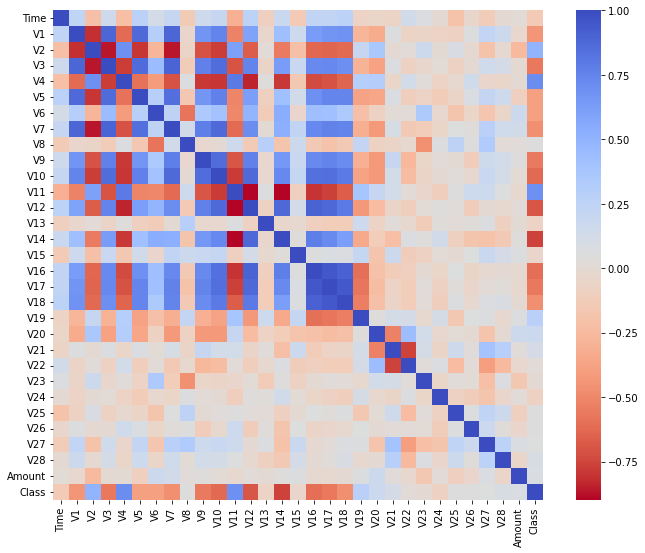

In [ ]:
# Correlation
plt.figure(figsize = (12, 9))
sns.heatmap(newX.corr(), square=True, cmap='coolwarm_r')

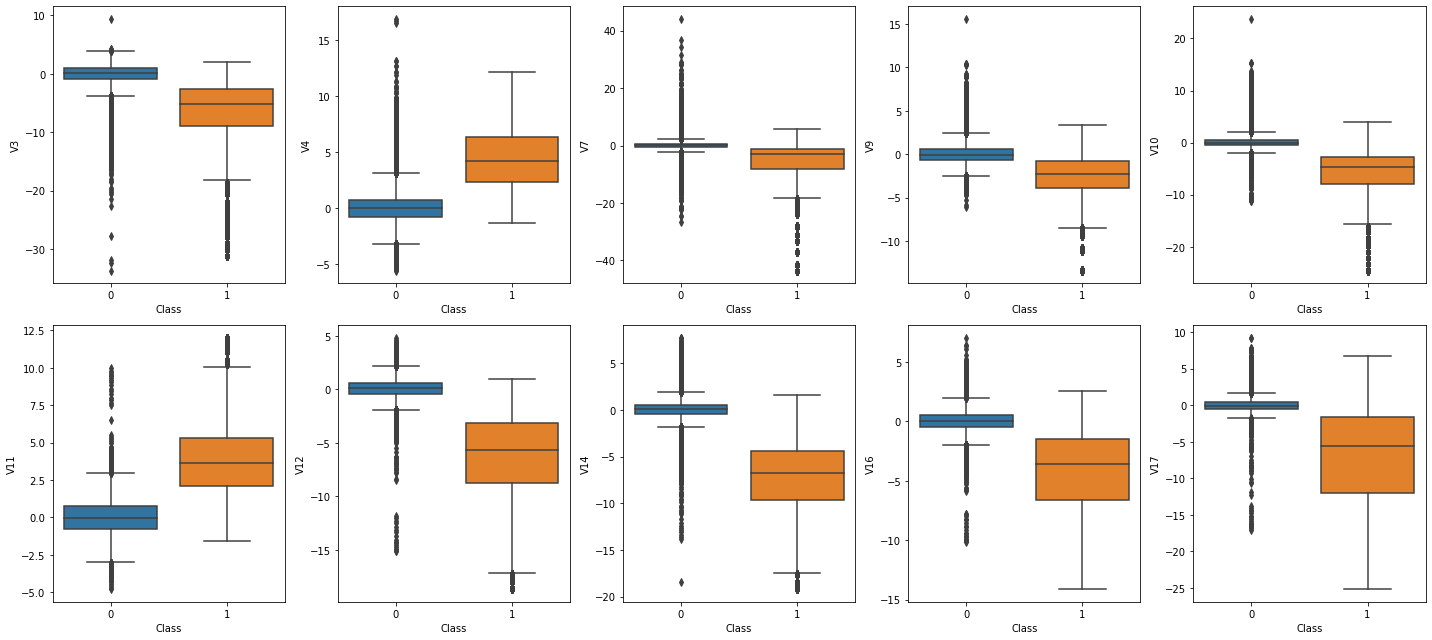

In [ ]:
vs = ['V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16','V17']
_, axes = plt.subplots(nrows = 2, ncols=5, figsize=(20,9))

for i in range(0, 10):
    y = vs[i]
    i, j = divmod(i, 5)
    sns.boxplot(x="Class", y=y, data=newX, ax=axes[i, j])
plt.tight_layout()

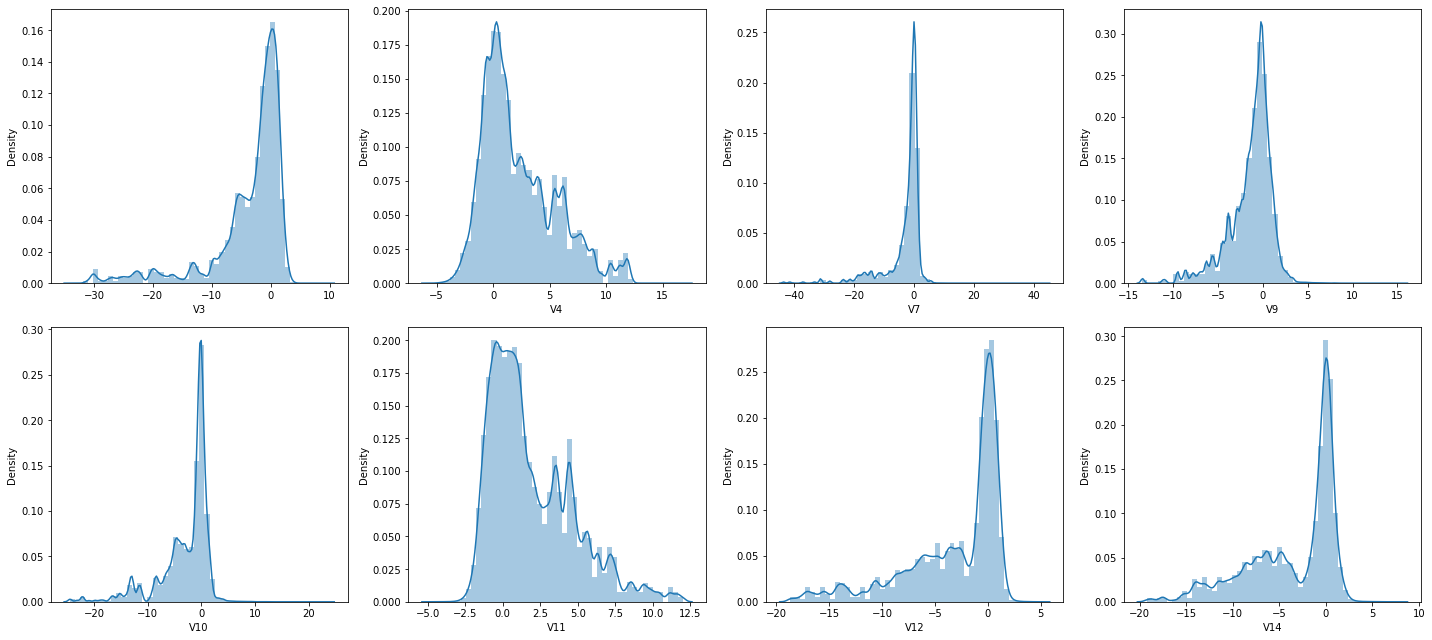

In [ ]:
_, axes = plt.subplots(nrows = 2, ncols=4, figsize=(20,9))
for i in range(0, 8):
    y = vs[i]
    i, j = divmod(i, 4)
    sns.distplot(newX[y], ax=axes[i, j])
plt.tight_layout()

# Random Oversampling with no outlier treatment

In [ ]:
# X = newX.drop('Class', axis=1)
# y = newX['Class']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

lr = LogisticRegression()
lr.fit(X_train, y_train)
mean_lr_cv = np.mean(cross_val_score(lr, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('Logistic Reg Model: ', str(mean_lr_cv))
preds = lr.predict(X_test)
print(roc_auc_score(y_test, preds))

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
mean_knn_cv = np.mean(cross_val_score(knn, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('KNN : ', str(mean_knn_cv))
preds = knn.predict(X_test)
print(roc_auc_score(y_test, preds))

svc = SVC()
svc.fit(X_train, y_train)
mean_svc_cv = np.mean(cross_val_score(svc, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('SVM',str(mean_svc_cv))
preds = svc.predict(X_test)
print(roc_auc_score(y_test, preds))

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
mean_dt_cv = np.mean(cross_val_score(dt, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('DT',str(mean_dt_cv))
preds = dt.predict(X_test)
print(roc_auc_score(y_test, preds))

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
mean_rf_cv = np.mean(cross_val_score(rf, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('RF',str(mean_rf_cv))
preds = rf.predict(X_test)
print(roc_auc_score(y_test, preds))

# xgboost = xgb.XGBClassifier(objective='binary:logistic')
# xgboost.fit(X_train, y_train)
# mean_xgboost_cv = np.mean(cross_val_score(xgboost, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
# print('XG',str(mean_xgboost_cv))

Logistic Reg Model:  0.9901134053121623
0.9278810954601311
KNN :  0.9999054746002944
0.9079170638429823
DT 0.9997933625313099
0.8569054485891149
RF 1.0
0.8877287233126226


In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
mean_svc_cv = np.mean(cross_val_score(svc, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('SVM',str(mean_svc_cv))
preds = svc.predict(X_test)
print(roc_auc_score(y_test, preds))

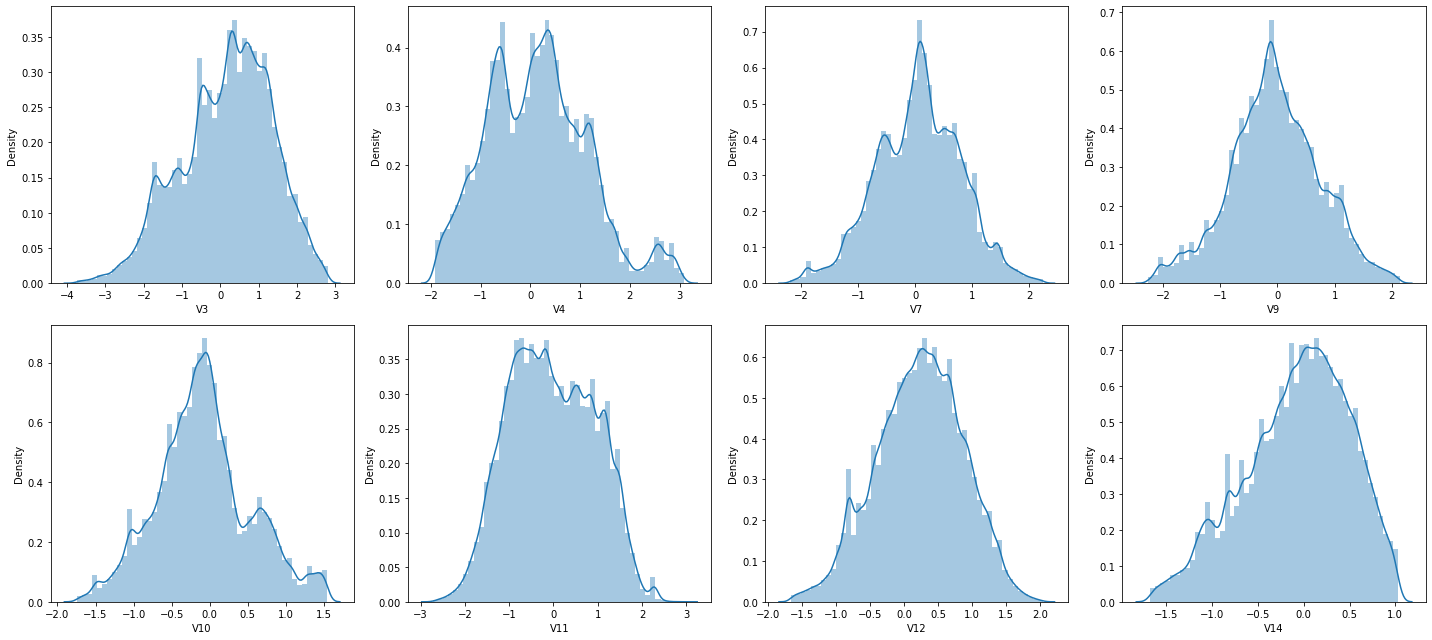

In [ ]:
vs = ['V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16','V17']
newX = pd.concat([X_train,y_train],axis=1)
for col in vs:
    for cl in [0,1]:
        temp = np.array(newX[col].loc[newX['Class']==cl])
        a, b = np.percentile(temp, 25), np.percentile(temp, 75)
        lower, upper = a - 1.5*(b - a), b + 1.5*(b - a)
        idx_to_drop = newX[(newX[col] > upper) | (newX[col] < lower)].index
#         X_train.drop(idx_to_drop, inplace=True)
#         y_train.drop(idx_to_drop, inplace=True)
        newX.drop(idx_to_drop, inplace=True)
print()
    
# Let us remove extreme outliers from the data that has high correlation with the our target variables
_, axes = plt.subplots(nrows = 2, ncols=4, figsize=(20,9))
for i in range(0, 8):
    y = vs[i]
    i, j = divmod(i, 4)
    sns.distplot(newX[y], ax=axes[i, j])
plt.tight_layout()

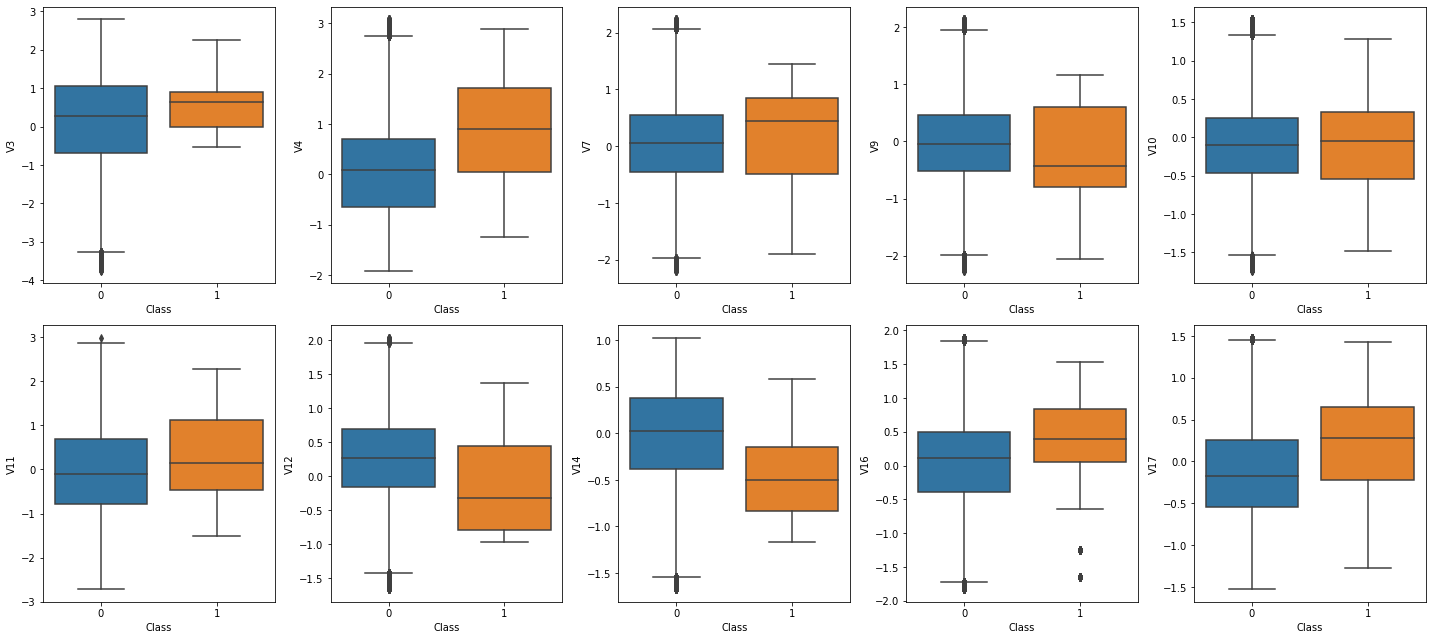

In [ ]:
_, axes = plt.subplots(nrows = 2, ncols=5, figsize=(20,9))

for i in range(0, 10):
    y = vs[i]
    i, j = divmod(i, 5)
    sns.boxplot(x="Class", y=y, data=newX, ax=axes[i, j])
plt.tight_layout()

In [ ]:
vs = ['V3', 'V4', 'V10', 'V11', 'V12', 'V14', 'V16','V17']
X_train_c = pd.concat([X_train, y_train], axis=1)
for col in vs:
    temp = np.array(X_train_c[col].loc[X_train_c['Class']==1])
    a, b = np.percentile(temp, 25), np.percentile(temp, 75)
    lower, upper = a - 1.5*(b - a), b + 1.5*(b - a)
    idx_to_drop = X_train_c[(X_train_c[col] > upper) | (X_train_c[col] < lower)].index
    
    X_train_c.drop(idx_to_drop, inplace=True)
    print()
    
# Let us remove extreme outliers from the data that has high correlation with the our target variables
vs = ['V3', 'V4', 'V10', 'V11', 'V12', 'V14', 'V16','V17']
_, axes = plt.subplots(nrows = 2, ncols=4, figsize=(20,9))
for i in range(0, 8):
    y = vs[i]
    i, j = divmod(i, 4)
    sns.distplot(X_train_c[y], ax=axes[i, j])
plt.tight_layout()

In [ ]:
X_train = newX.drop('Class', axis=1)
y_train = newX['Class']

lr = LogisticRegression()
lr.fit(X_train, y_train)
mean_lr_cv = np.mean(cross_val_score(lr, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('Logistic Reg Model: ', str(mean_lr_cv))
preds = lr.predict(X_test)
print(roc_auc_score(y_test, preds))

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
mean_knn_cv = np.mean(cross_val_score(knn, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('KNN : ', str(mean_knn_cv))
preds = knn.predict(X_test)
print(roc_auc_score(y_test, preds))

# svc = SVC()
# svc.fit(X_train, y_train)
# mean_svc_cv = np.mean(cross_val_score(svc, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
# print('SVM',str(mean_svc_cv))
# preds = svc.predict(X_test)
# print(roc_auc_score(y_test, preds))

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
mean_dt_cv = np.mean(cross_val_score(dt, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('DT',str(mean_dt_cv))
preds = dt.predict(X_test)
print(roc_auc_score(y_test, preds))

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
mean_rf_cv = np.mean(cross_val_score(rf, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('RF',str(mean_rf_cv))
preds = rf.predict(X_test)
print(roc_auc_score(y_test, preds))

# xgboost = xgb.XGBClassifier(objective='binary:logistic')
# xgboost.fit(X_train, y_train)
# mean_xgboost_cv = np.mean(cross_val_score(xgboost, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
# print('XG',str(mean_xgboost_cv))

Logistic Reg Model:  0.9188565376888347
0.9223503554488762
KNN :  0.9999645871623952
0.499806555993247
DT 0.9999195168434616
0.5045480875242613
RF 1.0
0.5


In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
mean_svc_cv = np.mean(cross_val_score(svc, X_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1))
print('SVM',str(mean_svc_cv))
preds = svc.predict(X_test)
print(roc_auc_score(y_test, preds))

SVM 0.9999356130602228
0.49967466235227914


# SMOTE



*   Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes.
*   This is an efficient alternative for solving the "class imbalance problems".

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values

print('Length of X (train): {} | Length of y (train): {}'.format(len(X_train), len(y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(X_test), len(y_test)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()


log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train, test in sss.split(X_train, y_train):
    pipeline  = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model     = pipeline.fit(X_train[train], y_train[train])
    best_est  = rand_log_reg.best_estimator_
    prediction = best_est.predict(X_train[test])
    
    accuracy_lst.append(pipeline.score(X_train[test], y_train[test]))
    precision_lst.append(precision_score(y_train[test], prediction))
    recall_lst.append(recall_score(y_train[test], prediction))
    f1_lst.append(f1_score(y_train[test], prediction))
    auc_lst.append(roc_auc_score(y_train[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)


Length of X (train): 227845 | Length of y (train): 227845
Length of X (test): 56962 | Length of y (test): 56962
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9731791349382256
precision: 0.05742458305395255
recall: 0.9063836193917496
f1: 0.1079545076216949
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(X_test)
print(classification_report(y_test, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.97      0.99     56876
       Fraud       0.05      0.94      0.09        86

    accuracy                           0.97     56962
   macro avg       0.52      0.96      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [ ]:
y_score = best_est.decision_function(X_test)

In [ ]:
mean_best_est_lr_cv = np.mean(cross_val_score(best_est, X_test, y_test, cv=10, scoring='roc_auc'))
mean_best_est_lr_cv

0.9847986110218034

**Precision/Recall Tradeoff**: The more precise (selective) our model is, the less cases it will detect. Example: Assuming that our model has a precision of 95%, Let's say there are only 5 fraud cases in which the model is 95% precise or more that these are fraud cases. Then let's say there are 5 more cases that our model considers 90% to be a fraud case, if we lower the precision there are more cases that our model will be able to detect.

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.80


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.80')

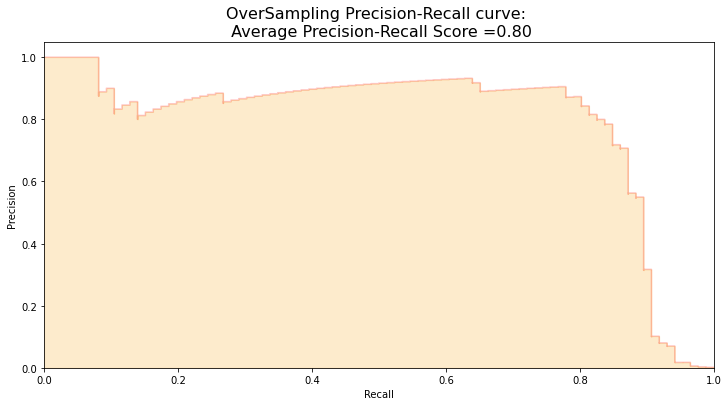

In [ ]:
from sklearn.metrics import precision_recall_curve

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

# Cost-sensitive learning using XGBoost

Here, instead of using resampling technqiues, we assign weights for both fraud and non-fraud class data points in the cost function during training.

The General rule of thumb is to assign the weights for majority and minority classes proportional to the number of data points in minority and majority classes respectively.

In [ ]:
from numpy import mean
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
df = shuffle(df)
frauds = df[df.Class == 1]
non_frauds = df[df.Class == 0]

print("Positive points: ", len(frauds))
print("Negative points: ", len(non_frauds))

Positive points:  492
Negative points:  284315


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values

In [ ]:
# define model
model = XGBClassifier(scale_pos_weight=len(non_frauds)/len(frauds))

In [ ]:
model

XGBClassifier(scale_pos_weight=577.8760162601626)

In [ ]:
# define evaluation procedure
cv = 5 #RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
# evaluate model

scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, verbose=2)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Mean ROC AUC: 0.97608


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.3min finished


# GridSearch with cost-sensitive *XGBoost*

In [ ]:
# Define grid
param_grid = {
    'scale_pos_weight': [577],
    'max_depth': range(3, 7, 2),
    'n_estimators': range(30, 50, 10),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
# define evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
# define grid search
cv = 5
grid = GridSearchCV(estimator = model, 
                    param_grid = param_grid,
                    n_jobs = -1, 
                    cv = cv, 
                    scoring = 'roc_auc', 
                    verbose = 10)

In [ ]:
# Fitting the grid
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
# Report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# Report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.976447 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 40, 'scale_pos_weight': 577}
0.973595 (0.010213) with: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 30, 'scale_pos_weight': 577}
0.976447 (0.006813) with: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 40, 'scale_pos_weight': 577}
0.971435 (0.009766) with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 30, 'scale_pos_weight': 577}
0.970742 (0.008686) with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 40, 'scale_pos_weight': 577}
0.953403 (0.019180) with: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 30, 'scale_pos_weight': 577}
0.955994 (0.020413) with: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 40, 'scale_pos_weight': 577}
0.946805 (0.015166) with: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 30, 'scale_pos_weight': 577}
0.946972 (0.018975) with: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 40, 'scale_pos_weight': 577}
0.969950 (0

In [ ]:
# Best parameters for model according to above auc_roc
# {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 40, 'scale_pos_weight': 577}
best_model = XGBClassifier(scale_pos_weight=577, max_depth=3, n_estimators=40, learning_rate=0.1)

In [ ]:
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)
roc_auc_score(y_test, preds)

0.9422881877849622